# 1. 라이브러리 구성

In [1]:
# 패키지 불러오기
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import datetime, timedelta
from category_encoders.ordinal import OrdinalEncoder

In [2]:
# 데이터 불러오기 
# 한글 설정
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# windows 인 경우
    font_name = font_manager.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
    rc('font', family=font_name)

# 2. 데이터 불러오기

In [102]:
# 데이터 불러오기
train = pd.read_excel('train.xlsx')
test = pd.read_excel('test.xlsx')

# 4. EDA

## 1) 데이터 파악하기

In [4]:
# 데이터 프레임 확인
train.head()

,pt_id,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,pt_birth,sex,body_height,body_weight,waist,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
0,1,0,0,1,0,1969-03-28,1,177.0,87.0,98.0,...,2.0,2.0,2,2,2,2,2,2,2,2.0
1,2,1,0,1,0,1944-10-31,2,152.0,61.0,NaN,...,2.0,2.0,2,2,2,1,2,2,2,2.0
2,3,1,0,0,0,1953-05-01,1,170.0,70.0,92.0,...,2.0,2.0,1,2,2,2,2,2,2,2.0
3,4,0,0,1,0,1957-12-20,2,153.0,62.0,NaN,...,2.0,2.0,1,2,2,2,2,2,2,2.0
4,5,1,0,0,0,1941-02-06,1,177.0,74.0,NaN,...,2.0,2.0,2,2,2,2,2,2,2,2.0


In [5]:
test.head()

,pt_id,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,pt_birth,sex,body_height,body_weight,waist,...,com_connective_dz,com_anemia,com_dm,com_dm_end_organ,com_hiv,com_solid_tumor,com_leukemia,com_lymphoma,com_metastatic_tumor,active_cancer
0,1,0,0,1,0,1969-03-28,1,177.0,87.0,98.0,...,2.0,2.0,2,2,2,2,2,2,2,2.0
1,2,1,0,1,0,1944-10-31,2,152.0,61.0,NaN,...,2.0,2.0,2,2,2,1,2,2,2,2.0
2,3,1,0,0,0,1953-05-01,1,170.0,70.0,92.0,...,2.0,2.0,1,2,2,2,2,2,2,2.0
3,4,0,0,1,0,1957-12-20,2,153.0,62.0,NaN,...,2.0,2.0,1,2,2,2,2,2,2,2.0
4,5,1,0,0,0,1941-02-06,1,177.0,74.0,NaN,...,2.0,2.0,2,2,2,2,2,2,2,2.0


In [6]:
# 데이터 프레임 속성 파악(행,열 개수)
print(train.shape)
print(test.shape)

(2318, 104)
(2318, 103)


In [7]:
# 데이터 프레임 속성 파악(열별 정보, 결측값, 열값 타입)
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 104 entries, pt_id to active_cancer
dtypes: float64(26), int64(71), object(7)
memory usage: 1.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 103 entries, pt_id to active_cancer
dtypes: float64(26), int64(70), object(7)
memory usage: 1.8+ MB


### index
- pt_id : 환자 id
- modality_ivtpa : 환자구분1 - 다중선택가능(intravenous tissue plasminogen activator  : 정맥내의 조직 플라스미노젠 활성인자)
- modality_iauk : 환자구분2 - 다중선택가능(intra-arterial urokinase : 동맥내의 응혈)
- modality_mechanical : 환자구분3 - 다중선택가능(mechanical : 기계로 작동되는)
- modality_etc : 환자구분4 - 다중선택가능(etc : 기타 등등)
- pt_birth :생년월일
- sex : 성별 (1=남, 2=녀)
- body_height : 키
- body_weight :몸무게
- waist :허리둘레
- adm_date : 입원일
- dc_date : 퇴원일
- pt_dc_route :퇴원경로
- initial_sbp_cal : 수축기 혈압(SBP)
- initial_dbp_cal : 이완기 혈압(DBP)
- htn_cal : 질환력1 - 고혈압
- dm_cal : 질환력2 - 당뇨
- hichol_cal : 질환력3 - 고콜레스테롤혈증
- smoking_cur : 현재흡연여부
- smoking_ex : 과거흡연여부
- coronary : 심혈관 질환력1 - 관상 동맥 질환
- vhd : 심혈관 질환력2 - 심장 판막 질환
- A_fib_cal : 심혈관 질환력3
- CHF_all : 심혈관 질환력4 - 울혈성 심마비 질환
- A_flutter : 심혈관 질환력5 - 심방 질환
- paod : 심혈관 질환력6 - 말초동맥 질환
- other_cardiac : 심혈관 질환력7 - 기타 심장 질환
- vhd_mechnical : 심혈관 질환력8 - 판막성 심장병 질환
- vhd_ms : 심혈관질환력9 - 다발성 경화증 질환
- prev_tia : 뇌졸중 질환력1 (재발여부) - 일과성허혈 발작증세
- prev_infarction : 뇌졸중 질환력2 (재발여부) - 경색증
- prev_hemorrhage : 뇌졸중 질환력3 (재발여부) - 출혈
- prev_unspecified : 뇌졸중 질환력4 (재발여부) - 비특이성
- smoking_none : 비흡연여부
- pre_aspirin : 심혈관 약물력1
- pre_plavix : 심혈관 약물력2
- pre_ticlid : 심혈관 약물력3
- pre_disgren : 심혈관 약물력4
- pre_cilostazol : 심혈관 약물력5
- pre_sarpogrelate : 심혈관 약물력6
- pre_aggrenox : 심혈관 약물력7
- pre_warfarin : 심혈관 약물력10
- pre_dabigatran : 심혈관 약물력11
- apixaban : 심혈관 약물력12
- rivaroxaban : 심혈관 약물력13
- pre_edoxavan : 심혈관 약물력14
- pre_statin : 심혈관 약물력15
- pre_ACE_inhibitor : 심혈관 약물력16
- pre_ARB : 심혈관 약물력17
- pre_CCB : 심혈관 약물력18
- pre_beta_blocker : 심혈관 약물력19
- pre_diuretics : 심혈관 약물력20
- hgb_cal : 혈색소(hgb) 검사결과
- hct_cal : 혈구용적(hct) 검사결과 
- wbc_cal : 백혈구(wbc) 검사결과
- platelet_cal : 혈소한(platelet) 검사결과
- pt : 프로트롬빈시간(pt) 검사결과
- ptt : 부분트롬보플라스틴시간(ptt) 검사결과
- ysr_bun : 혈중요소질소(bun) 검사결과 
- ysr_creatine : 크레아티닌(creatine) 검사결과
- glucose_fasting_cal : 공복혈당(fasting glucose) 검사결과
- tchol : 총콜레스테롤(tchol) 검사결과
- tg : 중성지방(tg) 검사결과
- hdl : 콜레스테롤(hdl) 검사결과
- ldl : 저밀도지질단백(ldl) 검사결과
- toast_tissue : TOAST tissue 구분 (급성 뇌졸중 치료에서의 재판 조직)
- pre_mrs : MRS 점수 - 최초 (수정랭킹척도)
- rankin3 : MRS 점수 - 3개월 후 
- alive_date : 생존확인 일자
- death_date : 사망확인 일자
- death_infarc : 사망원인1 - 경색 혈전
- death_hemorr : 사망원인2 - 치핵
- death_mi : 사망원인3 - 심근 경색증
- death_infect : 사망이유4 - 감염
- death_other : 사망이유5 - 기타
- death_ass_tl : 사망이유6
- c_death_cancer : 사망이유7
- c_death_6mo : 뇌졸중 환자 사망 여부 (6개월 이내)
- tl_onset_clear : Onset 시점 명확/불명확 여부
- tl_in_hospital : 원내 발병 여부
- tl_life_bleeding : 치료중 합병증1 - 출혈
- tl_herniation : 치료중 합병증2 - 탈장, 피막
- tl_infection : 치료중 합병증3 - 감염
- com_mi : 동반질환1 - 심근 경색증
- com_chf : 동반질환2 - 울혈성심장기능상실
- com_paod : 동반질환3 - 말초 동맥 폐쇄성 질환
- com_cva_tia : 동반질환4 - 갈비척추각
- com_af : 동반질환5
- com_dementia : 동반질환6 - 치매
- com_depression : 동반질환7 - 우울증
- com_pulm_dz : 동반질환8 - 폐 질환
- com_ulcer : 동반질환9 - 궤양 질환
- com_liver_dz : 동반질환10 - 간 질환
- com_renal_dz : 동반질환11 - 콩팥 질환
- com_connective_dz : 동반질환12 - 결합조직 질환
- com_anemia : 동반질환13 - 빈혈
- com_dm : 동반질환14 - 당뇨병
- com_dm_end_organ : 동반질환15 - 장기
- com_hiv : 동반질환16 - 면역결핍바이러스
- com_solid_tumor : 동반질환17 - 종양
- com_leukemia : 동반질환18 - 피부백혈병
- com_lymphoma : 동반질환19 - 림프종 질환
- com_metastatic_tumor : 동반질환20 - 전이 종양
- active_cancer : 동반질환21 - 활성암

In [8]:
#결측치 값이 포함된 칼럼과 개수 확인(train)
for index, value in zip(train.isnull().sum().index, train.isnull().sum()):
    print(f"{index} : {value}")

pt_id : 0
modality_ivtpa : 0
modality_iauk : 0
modality_mechanical : 0
modality_etc : 0
pt_birth : 0
sex : 0
body_height : 39
body_weight : 32
waist : 585
adm_date : 0
dc_date : 0
pt_dc_route : 3
initial_sbp_cal : 0
initial_dbp_cal : 0
htn_cal : 0
dm_cal : 0
hichol_cal : 0
smoking_cur : 0
smoking_ex : 0
coronary : 0
vhd : 0
A_fib_cal : 0
CHF_all : 0
A_flutter : 0
paod : 0
other_cardiac : 0
vhd_mechnical : 0
vhd_ms : 0
prev_tia : 0
prev_infarction : 0
prev_hemorrhage : 0
prev_unspecified : 0
smoking_none : 0
pre_aspirin : 0
pre_plavix : 0
pre_ticlid : 0
pre_disgren : 0
pre_cilostazol : 0
pre_sarpogrelate : 0
pre_aggrenox : 0
pre_warfarin : 0
pre_dabigatran : 0
apixaban : 0
rivaroxaban : 0
pre_edoxavan : 0
pre_statin : 0
pre_ACE_inhibitor : 0
pre_ARB : 0
pre_CCB : 0
pre_beta_blocker : 0
pre_diuretics : 0
hgb_cal : 0
hct_cal : 0
wbc_cal : 0
platelet_cal : 0
pt : 3
ptt : 3
ysr_bun : 8
ysr_creatine : 9
glucose_fasting_cal : 179
tchol : 22
tg : 44
hdl : 47
ldl : 51
toast_tissue : 42
pre_mrs 

In [9]:
#결측치 값이 포함된 칼럼과 개수 확인(train)
for index, value in zip(test.isnull().sum().index, train.isnull().sum()):
    print(f"{index} : {value}")

pt_id : 0
modality_ivtpa : 0
modality_iauk : 0
modality_mechanical : 0
modality_etc : 0
pt_birth : 0
sex : 0
body_height : 39
body_weight : 32
waist : 585
adm_date : 0
dc_date : 0
pt_dc_route : 3
initial_sbp_cal : 0
initial_dbp_cal : 0
htn_cal : 0
dm_cal : 0
hichol_cal : 0
smoking_cur : 0
smoking_ex : 0
coronary : 0
vhd : 0
A_fib_cal : 0
CHF_all : 0
A_flutter : 0
paod : 0
other_cardiac : 0
vhd_mechnical : 0
vhd_ms : 0
prev_tia : 0
prev_infarction : 0
prev_hemorrhage : 0
prev_unspecified : 0
smoking_none : 0
pre_aspirin : 0
pre_plavix : 0
pre_ticlid : 0
pre_disgren : 0
pre_cilostazol : 0
pre_sarpogrelate : 0
pre_aggrenox : 0
pre_warfarin : 0
pre_dabigatran : 0
apixaban : 0
rivaroxaban : 0
pre_edoxavan : 0
pre_statin : 0
pre_ACE_inhibitor : 0
pre_ARB : 0
pre_CCB : 0
pre_beta_blocker : 0
pre_diuretics : 0
hgb_cal : 0
hct_cal : 0
wbc_cal : 0
platelet_cal : 0
pt : 3
ptt : 3
ysr_bun : 8
ysr_creatine : 9
glucose_fasting_cal : 179
tchol : 22
tg : 44
hdl : 47
ldl : 51
toast_tissue : 42
pre_mrs 

In [9]:
# 데이터 프레임 속성 파악(기술 통계량)
train.describe()
train[['body_height', 'body_weight', 'waist', 'initial_sbp_cal', 'initial_dbp_cal', 'hgb_cal', 'hct_cal', 'wbc_cal', 'platelet_cal', 'pt', 'ptt', 'ysr_bun', 'ysr_creatine', 'glucose_fasting_cal', 'tchol', 'tg', 'hdl', 'ldl']].describe()

,body_height,body_weight,waist,initial_sbp_cal,initial_dbp_cal,hgb_cal,hct_cal,wbc_cal,platelet_cal,pt,ptt,ysr_bun,ysr_creatine,glucose_fasting_cal,tchol,tg,hdl,ldl
count,2279.000000,2286.000000,1733.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2315.00000,2315.000000,2310.000000,2309.000000,2139.000000,2296.000000,2274.000000,2271.000000,2267.000000
mean,163.049144,62.537275,85.001731,149.163072,83.816221,13.547390,40.045082,8.381405,222.512554,1.05835,30.116873,17.887203,0.994898,124.972978,166.048955,114.228320,45.287010,100.419762
std,8.888651,11.603529,9.679417,28.608503,16.604903,1.930709,5.284958,3.251573,69.219099,0.54688,12.533714,8.349901,0.644311,48.699425,40.637578,74.747785,12.483853,35.555931
min,131.000000,30.000000,54.000000,57.000000,30.000000,4.000000,11.500000,1.120000,38.000000,0.76000,1.040000,0.000000,0.000000,47.500000,66.000000,21.100000,5.000000,10.300000
25%,156.000000,55.000000,78.000000,130.000000,72.000000,12.400000,36.800000,6.330000,178.000000,0.94000,26.300000,13.000000,0.720000,96.000000,135.075000,69.000000,37.000000,73.000000
50%,163.000000,62.000000,85.000000,148.000000,81.000000,13.700000,40.200000,7.860000,215.500000,0.99000,29.200000,16.400000,0.900000,112.000000,163.500000,96.000000,44.000000,98.000000
75%,170.000000,70.000000,91.000000,166.000000,94.000000,14.900000,43.775000,9.750000,258.000000,1.06000,32.200000,20.700000,1.060000,139.000000,193.000000,136.000000,52.900000,123.000000
max,188.000000,120.000000,150.000000,270.000000,210.000000,21.400000,59.900000,47.400000,692.000000,12.30000,365.000000,97.000000,8.700000,999.000000,366.000000,856.000000,114.000000,234.000000


#### 키, 몸무게, 허리둘레, 혈압 - SBP, 혈압 - DBP, 실험실검사결과 - hgb, 실험실검사결과 - hct, 실험실검사결과 - wbc, 실험실검사결과 - platelet, 실험실검사결과 - pt, 실험실검사결과 - ptt, 실험실검사결과 - bun, 실험실검사결과 - creatine, 실험실검사결과 - fasting glucose, 실험실검사결과 - tchol, 실험실검사결과 - tg, 실험실검사결과 - hdl, 실험실검사결과 - ldl의 기술통계량

count    2318.000000
mean      149.163072
std        28.608503
min        57.000000
25%       130.000000
50%       148.000000
75%       166.000000
max       270.000000
Name: initial_sbp_cal, dtype: float64


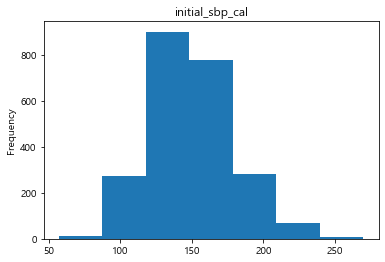

In [11]:
# initial_sbp_cal(혈압 - SBP)의 기술통계량과 분포 확인
train_body_height = train.dropna(subset=['initial_sbp_cal'])

print(train_body_height['initial_sbp_cal'].astype('int').describe())

train_body_height['initial_sbp_cal'].astype('int').plot.hist(bins = 7, title = "initial_sbp_cal")

Text(0.5, 0, 'SBP(수축기혈압)')

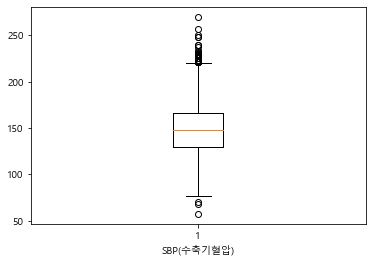

In [12]:
# initial_sbp_cal(혈압 - SBP)의 극단치 확인
train_body_sbp = train.dropna(subset=['initial_sbp_cal'])

fig, ax = plt.subplots()

ax.boxplot(train_body_sbp['initial_sbp_cal'])
ax.set_xlabel('SBP(수축기혈압)')

count    2139.000000
mean      124.952314
std        48.715930
min        47.000000
25%        96.000000
50%       112.000000
75%       139.000000
max       999.000000
Name: glucose_fasting_cal, dtype: float64


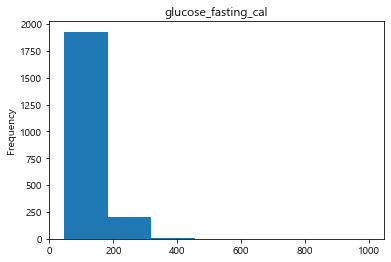

In [13]:
# 'glucose_fasting_cal'(공복혈당)의 기술통계량과 분포 확인
train_body_glucose = train.dropna(subset=['glucose_fasting_cal'])

print(train_body_glucose['glucose_fasting_cal'].astype('int').describe())

train_body_glucose['glucose_fasting_cal'].astype('int').plot.hist(bins = 7, title = "glucose_fasting_cal")

Text(0.5, 0, 'glucose(공복혈당)')

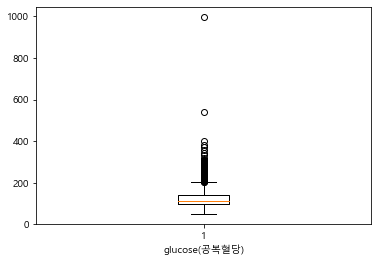

In [14]:
# 'glucose_fasting_cal'(공복혈당)의 극단치 확인
train_body_glucose = train.dropna(subset=['glucose_fasting_cal'])

fig, ax = plt.subplots()

ax.boxplot(train_body_glucose['glucose_fasting_cal'])
ax.set_xlabel('glucose(공복혈당)')

count    2318.000000
mean        0.132873
std         0.339511
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: c_death_6mo, dtype: float64


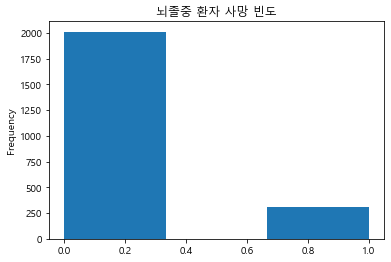

In [15]:
# c_death_6mo(6개월 이내 사망)의 기술통계량과 분포 확인
train_death = train.dropna(subset=['c_death_6mo'])

print(train_death['c_death_6mo'].astype('int').describe())

train_death['c_death_6mo'].astype('int').plot.hist(bins = 3,title = "뇌졸중 환자 사망 빈도")

In [16]:
# 성별에 따른 결과변수 (6개월 이내 사망) 합 시각화
train_sex = train.groupby(['sex'])['c_death_6mo'].sum().reset_index()
train_sex.set_index('sex', inplace = True)
train_sex = train_sex.rename(columns={"c_death_6mo":'(6개월 이내)사망'},index = {1:'남성', 2:'여성'})
train_sex

,(6개월 이내)사망
sex,
남성,162
여성,146


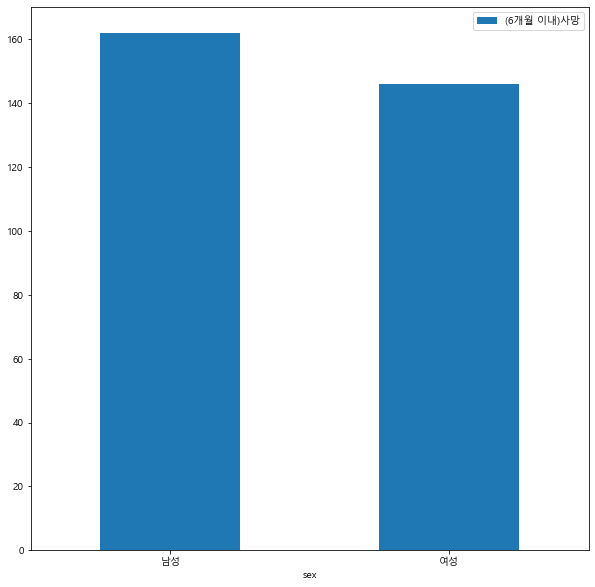

In [17]:
train_sex.plot.bar(rot=0, figsize=(10, 10))

In [18]:
# 퇴원경로에 따른 결과변수 (6개월 이내 사망) 합 시각화
train_pt_dc_route = train.groupby(['pt_dc_route'])['c_death_6mo'].sum().reset_index()
train_pt_dc_route.set_index('pt_dc_route', inplace = True)
train_pt_dc_route = train_pt_dc_route.rename(columns={"c_death_6mo":'(6개월 이내)사망'})
train_pt_dc_route

,(6개월 이내)사망
pt_dc_route,
사망,158
자가 퇴원,27
재활의학과 전과,22
타병원/타과 전과,101


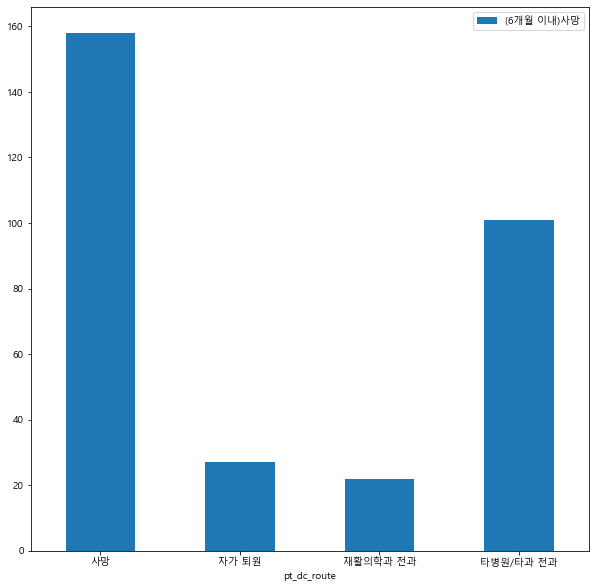

In [19]:
train_pt_dc_route.plot.bar(rot=0, figsize=(10, 10))

In [20]:
# 비흡연여부에 따른 결과변수 (6개월 이내 사망) 합 시각화
train_smoking_none = train.groupby(['smoking_none'])['c_death_6mo'].sum().reset_index()
train_smoking_none.set_index('smoking_none', inplace = True)
train_smoking_none = train_smoking_none.rename(columns={"c_death_6mo":'(6개월 이내)사망'},index={0:'비흡연', 1:'흡연'})
train_smoking_none

,(6개월 이내)사망
smoking_none,
비흡연,90
흡연,218


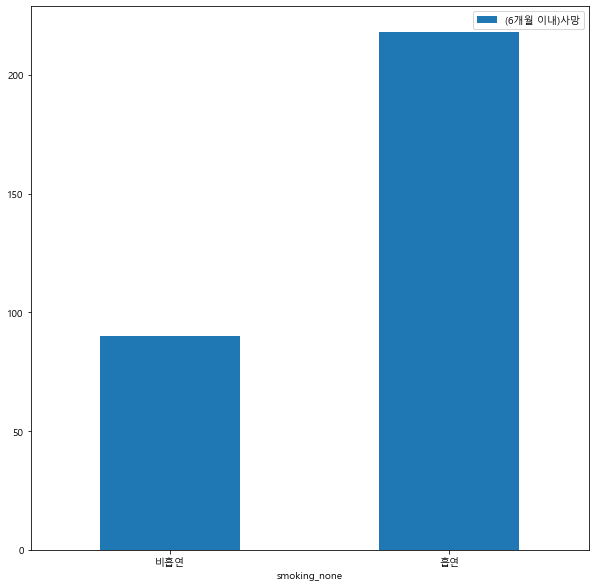

In [21]:
train_smoking_none.plot.bar(rot=0, figsize=(10, 10))

# 5. 데이터 전처리

## 1) 결측치 처리

- 몸무게,키(body_weight, body_height) : 결측 겹치는거 29명 확인(데이터 프레임 코드) -> 그대로 유지

In [10]:
DF1 = train.loc[train['body_height'].isna(), ['pt_id', 'body_height']]
DF2 = train.loc[train['body_weight'].isna(), ['pt_id', 'body_weight']]
print(pd.merge(DF1, DF2, on='pt_id'))

    pt_id  body_height  body_weight
0     855          NaN          NaN
1     857          NaN          NaN
2     871          NaN          NaN
3     878          NaN          NaN
4     994          NaN          NaN
5    1051          NaN          NaN
6    1077          NaN          NaN
7    1079          NaN          NaN
8    1181          NaN          NaN
9    1225          NaN          NaN
10   1229          NaN          NaN
11   1302          NaN          NaN
12   1322          NaN          NaN
13   1323          NaN          NaN
14   1328          NaN          NaN
15   1330          NaN          NaN
16   1331          NaN          NaN
17   1333          NaN          NaN
18   1334          NaN          NaN
19   1335          NaN          NaN
20   1336          NaN          NaN
21   1369          NaN          NaN
22   1375          NaN          NaN
23   1377          NaN          NaN
24   1399          NaN          NaN
25   1419          NaN          NaN
26   1593          NaN      

In [23]:
condition = ((train['body_weight'].isna()==True) | (train['body_height'].isna()==True))
train.loc[condition, ['body_weight','body_height']]

,body_weight,body_height
854,NaN,NaN
855,65.0,NaN
856,NaN,NaN
870,NaN,NaN
877,NaN,NaN
993,NaN,NaN
1028,72.0,NaN
1047,54.0,NaN
1050,NaN,NaN
1069,42.8,NaN


- 퇴원경로(pt_dc_route) : 3명 6개월 이내 사망 결과 변수 확인시 0으로 6개월 이상 입원을 한다고 가정해 입원중 추가 (데이터 프레임 코드)

In [64]:
train.loc[test['pt_dc_route'].isna(),['c_death_6mo']]

,c_death_6mo
4,0
10,0
11,0


In [65]:
train['pt_dc_route']=train['pt_dc_route'].fillna('입원중')
test['pt_dc_route']=test['pt_dc_route'].fillna('입원중')
train['pt_dc_route'].unique()

array(['자가 퇴원', '재활의학과 전과', '입원중', '사망', '타병원/타과 전과'], dtype=object)

- 실험실검사결과 : 검사X -> 행 삭제

In [66]:
train = train.dropna(subset=['pt','ptt','ysr_bun','ysr_creatine','glucose_fasting_cal','tchol','tg','hdl','ldl'])
test = test.dropna(subset=['pt','ptt','ysr_bun','ysr_creatine','glucose_fasting_cal','tchol','tg','hdl','ldl'])

In [67]:
train[['pt','ptt','ysr_bun','ysr_creatine','glucose_fasting_cal','tchol','tg','hdl','ldl']].isnull().sum()

pt                     0
ptt                    0
ysr_bun                0
ysr_creatine           0
glucose_fasting_cal    0
tchol                  0
tg                     0
hdl                    0
ldl                    0
dtype: int64

- MRS 점수 - 3개월 후(rankin3) : 일찍 퇴원한 경우 7 입력

In [68]:
train.loc[test['rankin3'].isna(),['adm_date','dc_date','c_death_6mo']]

,adm_date,dc_date,c_death_6mo
6,2019-06-06,2019-06-19,0
188,2009-10-11,2009-10-19,0
354,2011-11-12,2011-11-15,0
385,2012-04-13,2012-04-20,0
441,2013-01-01,2013-01-03,0
...,...,...,...
2282,2019-06-30,2019-07-10,0
2312,2019-07-13,2019-07-24,0
2313,2019-07-31,2019-08-20,0
2314,2019-08-05,2019-08-15,0


In [69]:
train['rankin3']=train['rankin3'].fillna(7)

In [70]:
test['rankin3']=test['rankin3'].fillna(7)

In [71]:
train['rankin3'].unique()

array([2., 0., 7., 6., 5., 4., 1., 3.])

In [72]:
train[['rankin3','c_death_6mo']]

,rankin3,c_death_6mo
2,2.0,0
3,2.0,0
5,0.0,0
6,7.0,0
7,6.0,1
...,...,...
2313,7.0,0
2314,7.0,0
2315,4.0,0
2316,7.0,0


- 사망확인 일자/사망이유 : 1명 사망했는데 원인x -> 행삭제처리

In [73]:
condition = ((train['death_date'].isna()==False) & (train['death_ass_tl'].isna()==True))
train.loc[condition, ['pt_id','death_date','death_ass_tl','c_death_6mo']]

,pt_id,death_date,death_ass_tl,c_death_6mo
1010,1011,2018-10-15,NaN,1


In [74]:
train = train.drop(index=1010)
test = test.drop(index=1010)

- 동반질환 : 행 삭제

In [75]:
train = train.dropna(subset=['com_paod','com_ulcer','com_liver_dz','com_renal_dz','com_connective_dz','com_anemia','active_cancer'])
test = test.dropna(subset=['com_paod','com_ulcer','com_liver_dz','com_renal_dz','com_connective_dz','com_anemia','active_cancer'])

In [76]:
train[['com_paod','com_ulcer','com_liver_dz','com_renal_dz','com_connective_dz','com_anemia','active_cancer']].isnull().sum()

com_paod             0
com_ulcer            0
com_liver_dz         0
com_renal_dz         0
com_connective_dz    0
com_anemia           0
active_cancer        0
dtype: int64

- TOAST tissue 구분 (급성 뇌졸중 치료에서의 재판 조직) - 행 삭제

In [77]:
train['toast_tissue'].unique()

array(['UT', 'CE', 'LAA', 'UN', 'SOD', 'LAC', nan, 'UI'], dtype=object)

In [78]:
train = train.dropna(subset=['toast_tissue'])
test = test.dropna(subset=['toast_tissue'])

In [79]:
train[['toast_tissue']].isnull().sum()

toast_tissue    0
dtype: int64

- 사망이유 6 (death_ass_tl) - 결측치가 2011개로 컬럼 삭제 처리

In [80]:
train = train.drop(columns=['death_ass_tl'])
test = test.drop(columns=['death_ass_tl'])

# 6. Feature Engineering

In [81]:
# 환자 id(pt_id) 제거(의미없는 변수)
train = train.drop(columns = ['pt_id'])
test = test.drop(columns = ['pt_id'])

In [82]:
# 허리둘레(waist) 제거(의미없는 변수)
train = train.drop(columns = ['waist'])
test = test.drop(columns = ['waist'])

### 1) 파생변수 생성

In [83]:
# BMI 파생변수
train['BMI'] = train['body_height'] / (train['body_weight']**2)
test['BMI'] = test['body_height'] / (test['body_weight']**2)

In [84]:
#hos_per입원기간 파생병수
train['adm_date_datetime'] = pd.to_datetime(train['adm_date'])
test['adm_date_datetime'] = pd.to_datetime(test['adm_date'])
train['dc_date_datetime'] = pd.to_datetime(train['dc_date'])
test['dc_date_datetime'] = pd.to_datetime(test['dc_date'])

In [85]:
train['hos_per'] = train['dc_date_datetime'] - train['adm_date_datetime']
test['hos_per'] = test['dc_date_datetime'] - test['adm_date_datetime']

In [86]:
test['hos_per']

2      22 days
3      14 days
5       8 days
6      13 days
7      18 days
         ...  
2313   20 days
2314   10 days
2315   17 days
2316   10 days
2317   97 days
Name: hos_per, Length: 2047, dtype: timedelta64[ns]

- time 형식은 모델링에서 안먹힘
- 기간 계산 코드는 보류

In [87]:
test['hos_per'].unique()

array([ 1900800000000000,  1209600000000000,   691200000000000,
        1123200000000000,  1555200000000000,  1036800000000000,
          86400000000000,   950400000000000,  1814400000000000,
         604800000000000,  3110400000000000,   518400000000000,
         864000000000000,   172800000000000,  1382400000000000,
         432000000000000,  1468800000000000,   345600000000000,
        1987200000000000,   259200000000000,  1296000000000000,
                       0,   777600000000000,  2073600000000000,
        2419200000000000,  3628800000000000,  1641600000000000,
        2592000000000000,  2332800000000000,  3456000000000000,
        1728000000000000,  2160000000000000,  3196800000000000,
        4320000000000000,  2937600000000000,  3715200000000000,
        2678400000000000,  5011200000000000,  4147200000000000,
        2246400000000000,  2505600000000000, 32918400000000000,
        3369600000000000,  4665600000000000,  3283200000000000,
        4233600000000000,  5097600000000

In [88]:
#age현재나이 파생편수
test['pt_birth_y'] = test['pt_birth'].str[2:4]
train['pt_birth_y'] = train['pt_birth'].str[2:4]

In [89]:
test = test.astype({'pt_birth_y':'int'})
train = train.astype({'pt_birth_y':'int'})

In [90]:
test['age'] = 100 - test['pt_birth_y'] + 22
train['age'] = 100 - train['pt_birth_y'] + 22

### 2) 파생변수 관련 컬럼 삭제

In [91]:
train.drop('body_height', axis=1, inplace=True)
test.drop('body_height', axis=1, inplace=True)

train.drop('body_weight', axis=1, inplace=True)
test.drop('body_weight', axis=1, inplace=True)

train.drop('adm_date', axis=1, inplace=True)
test.drop('adm_date', axis=1, inplace=True)

train.drop('dc_date', axis=1, inplace=True)
test.drop('dc_date', axis=1, inplace=True)

train.drop('adm_date_datetime', axis=1, inplace=True)
test.drop('adm_date_datetime', axis=1, inplace=True)


train.drop('dc_date_datetime', axis=1, inplace=True)
test.drop('dc_date_datetime', axis=1, inplace=True)

train.drop('pt_birth', axis=1, inplace=True)
test.drop('pt_birth', axis=1, inplace=True)

train.drop('pt_birth_y', axis=1, inplace=True)
test.drop('pt_birth_y', axis=1, inplace=True)

### 3) 날짜 변수 추가 삭제 (생존확인날짜, 사망확인날짜)

In [92]:
train.drop('alive_date', axis=1, inplace=True)
test.drop('alive_date', axis=1, inplace=True)

train.drop('death_date', axis=1, inplace=True)
test.drop('death_date', axis=1, inplace=True)

# Scaling, Encoding

### 범주형 데이터 처리

In [93]:
categorical_feats = train.dtypes[train.dtypes == "object"].index.tolist()

In [94]:
categorical_feats

['pt_dc_route', 'toast_tissue']

In [96]:
numerical_feats = train.dtypes[train.dtypes != "object"].index.tolist()

In [97]:
numerical_feats

['modality_ivtpa',
 'modality_iauk',
 'modality_mechanical',
 'modality_etc',
 'sex',
 'initial_sbp_cal',
 'initial_dbp_cal',
 'htn_cal',
 'dm_cal',
 'hichol_cal',
 'smoking_cur',
 'smoking_ex',
 'coronary',
 'vhd',
 'A_fib_cal',
 'CHF_all',
 'A_flutter',
 'paod',
 'other_cardiac',
 'vhd_mechnical',
 'vhd_ms',
 'prev_tia',
 'prev_infarction',
 'prev_hemorrhage',
 'prev_unspecified',
 'smoking_none',
 'pre_aspirin',
 'pre_plavix',
 'pre_ticlid',
 'pre_disgren',
 'pre_cilostazol',
 'pre_sarpogrelate',
 'pre_aggrenox',
 'pre_warfarin',
 'pre_dabigatran',
 'apixaban',
 'rivaroxaban',
 'pre_edoxavan',
 'pre_statin',
 'pre_ACE_inhibitor',
 'pre_ARB',
 'pre_CCB',
 'pre_beta_blocker',
 'pre_diuretics',
 'hgb_cal',
 'hct_cal',
 'wbc_cal',
 'platelet_cal',
 'pt',
 'ptt',
 'ysr_bun',
 'ysr_creatine',
 'glucose_fasting_cal',
 'tchol',
 'tg',
 'hdl',
 'ldl',
 'pre_mrs',
 'rankin3',
 'death_infarc',
 'death_hemorr',
 'death_mi',
 'death_infect',
 'death_other',
 'c_death_cancer',
 'c_death_6mo',
 't

In [98]:
train = pd.get_dummies(train,columns=['pt_dc_route'])
test = pd.get_dummies(test,columns=['pt_dc_route'])

In [99]:
train.head()

,modality_ivtpa,modality_iauk,modality_mechanical,modality_etc,sex,initial_sbp_cal,initial_dbp_cal,htn_cal,dm_cal,hichol_cal,...,com_metastatic_tumor,active_cancer,BMI,hos_per,age,pt_dc_route_사망,pt_dc_route_입원중,pt_dc_route_자가 퇴원,pt_dc_route_재활의학과 전과,pt_dc_route_타병원/타과 전과
2,1,0,0,0,1,220,110,0,1,0,...,2,2.0,0.034694,22 days,69,0,0,0,1,0
3,0,0,1,0,2,90,50,1,1,1,...,2,2.0,0.039802,14 days,65,0,0,1,0,0
5,1,0,1,0,1,110,67,0,0,0,...,2,2.0,0.049246,8 days,79,0,0,1,0,0
6,1,0,1,0,2,144,64,1,0,1,...,2,2.0,0.049587,13 days,93,0,0,0,1,0
7,0,0,1,0,1,187,101,1,1,1,...,2,2.0,0.024688,18 days,73,1,0,0,0,0
